# 1. Exploratory Data Analysis

Column descriptions:
- `ID` - Customer's unique identification
- `Year_Birth` - Customer's birth year
- `Education` - Customer's education
- `Marital_Status` - Customer's marital status
- ` Income` - Customer's yearly household income
- `Kidhome` - # of kids in household
- `Teenhome` - # of teenagers in household
- `Dt_Customer` - Date of customer's enrollment with the company
- `Recency` - # of days since customer's last purchase
- `MntWines` - Amount spent on wine in the last 2 years
- `MntFruits` - Amount spent on fruit in the last 2 years
- `MntMeatProducts` - Amount spent on meat in the last 2 years
- `MntFishProducts` - Amount spent on fish in the last 2 years
- `MntSweetProducts` - Amount spent on sweet products in the last 2 years
- `MntGoldProds` - Amount spent on gold products in the last 2 years
- `NumDealsPurchases` - # of purchases made with a discount
- `NumWebPurchases` - # of purchases made on company website
- `NumCatalogPurchases` - # of purchases made on the catalog
- `NumStorePurchases` - # of purchase made in store
- `NumWebVisitsMonth` - # of website visits in the last month
- `AcceptedCmp1` - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response` - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `Complain` - 1 if customer complained within the last 2 years
- `Country` - Country where the customer is located (not from)

## Outline
- Are there any nulls? How are you going to handle them?
- Are there any variables that we need to transform? (Data types, text cleaning, etc.)
- Are there any outliers?
- Can we perform feature engineering?
- Are there any trends within the data?

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta


In [2]:
data = pd.read_csv('marketing_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
data.rename({' Income ':'Income'},axis=1,inplace=True)

### Check for nulls

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In this case, we are going to drop the rows with the null values for numerous reasons:
1. The total null values account for <5% of the data
2. We want to keep the `Income` column as it is an important feature for our analysis
3. Filling in the nulls with the median/mean/mode will not account for the variance with the other variables

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

### Variable transformation

We are going to change the following dtypes of the following columns:
- ` Income ` to float
- `Dt_Customer` to datetime

In [8]:
data['Income'] = data['Income'].str.replace("[$,]","").astype(float)

In [9]:
data['Dt_Customer'].head()

0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: Dt_Customer, dtype: object

In [10]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [12]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Check for outliers

In [13]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

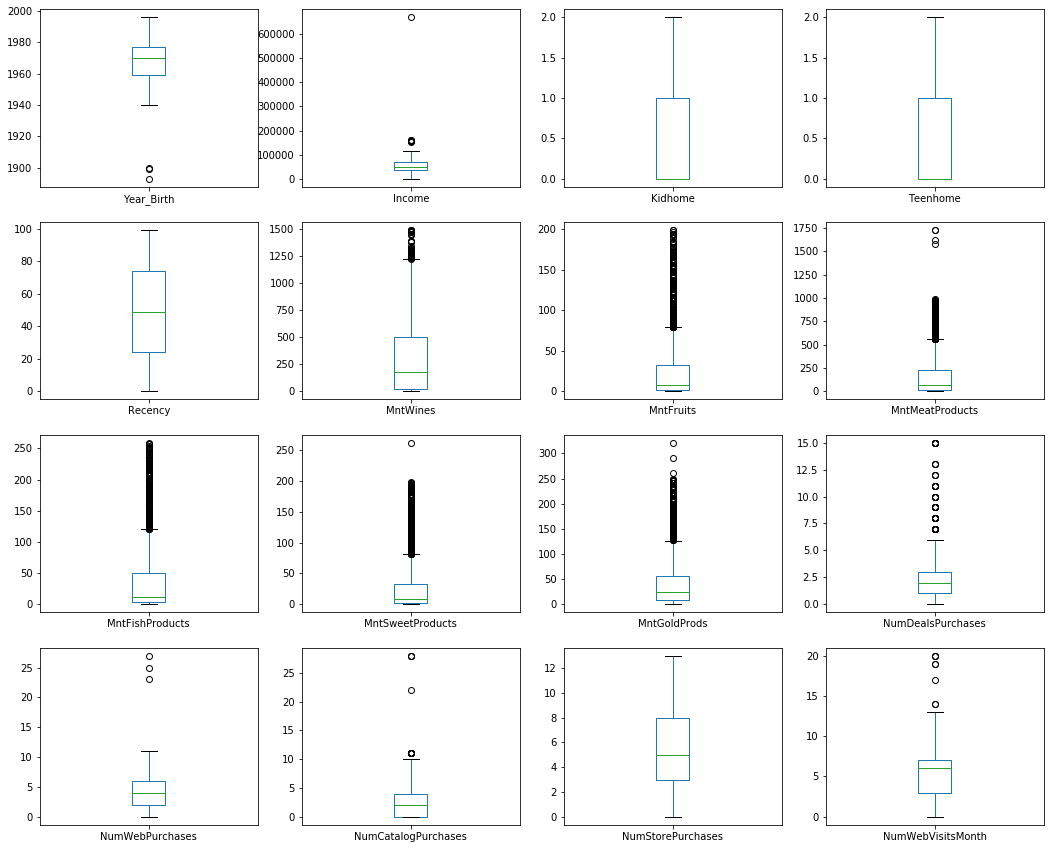

In [14]:
numeric_cols = data.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Response', 'Complain'])
data[numeric_cols].plot(subplots=True, layout=(4,4), kind='box', figsize=(18,15))

plt.show()

The columns that show true outliers are `Year_Birth` and `Income` with people being born before 1900 (meaning that they would be over 100 years old, which is unlikely) and 1 person making over \$600,000. These may be data entry errors, but we are not entirely sure.

Let's drop customers who were born before 1900 and the person who has an income over $600,000.

In [15]:
data = data.drop(data[data['Year_Birth'] <= 1900].index)

In [16]:
data['Year_Birth'].sort_values().head()

2171    1940
1740    1941
1350    1943
1644    1943
1209    1943
Name: Year_Birth, dtype: int64

In [17]:
data[data['Income'] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [18]:
data = data.drop(data[data['Income'] > 600000].index)

In [19]:
data['Income'].sort_values()

1466      1730.0
961       2447.0
1291      3502.0
663       4023.0
14        4428.0
          ...   
325     157146.0
2204    157243.0
853     157733.0
497     160803.0
731     162397.0
Name: Income, Length: 2212, dtype: float64

### Variable transformation (cont.)

We'll explore the `Education` and `Marital_Status` columns.

In [20]:
data['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

To better understand these unique values, let's look at the ages and the income of these customers.

In [21]:
data['Age'] = datetime.datetime.now().year - data['Year_Birth']

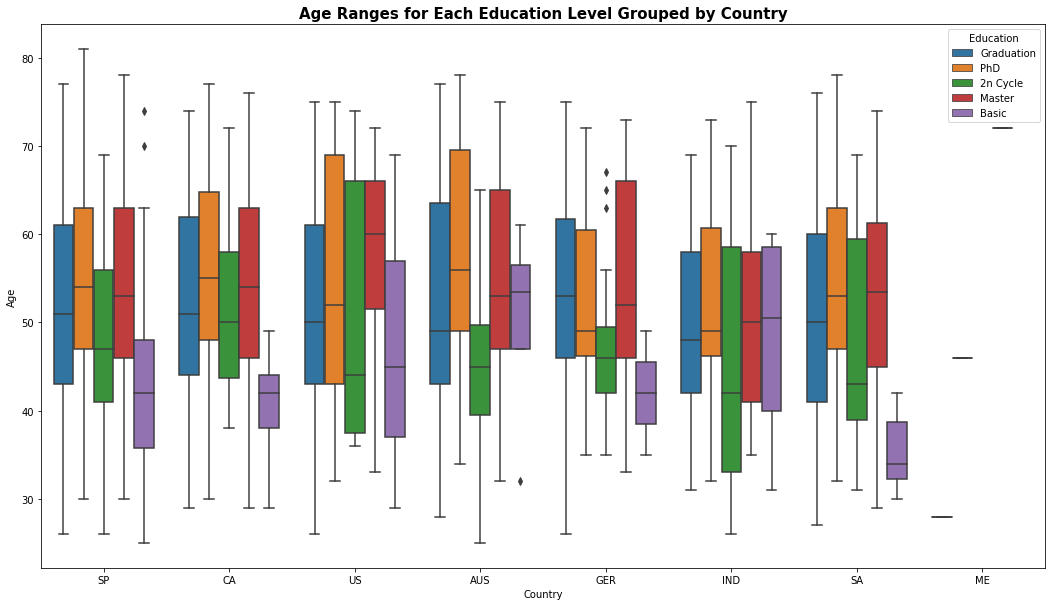

In [22]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Age', hue='Education',data=data)
plt.title("Age Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

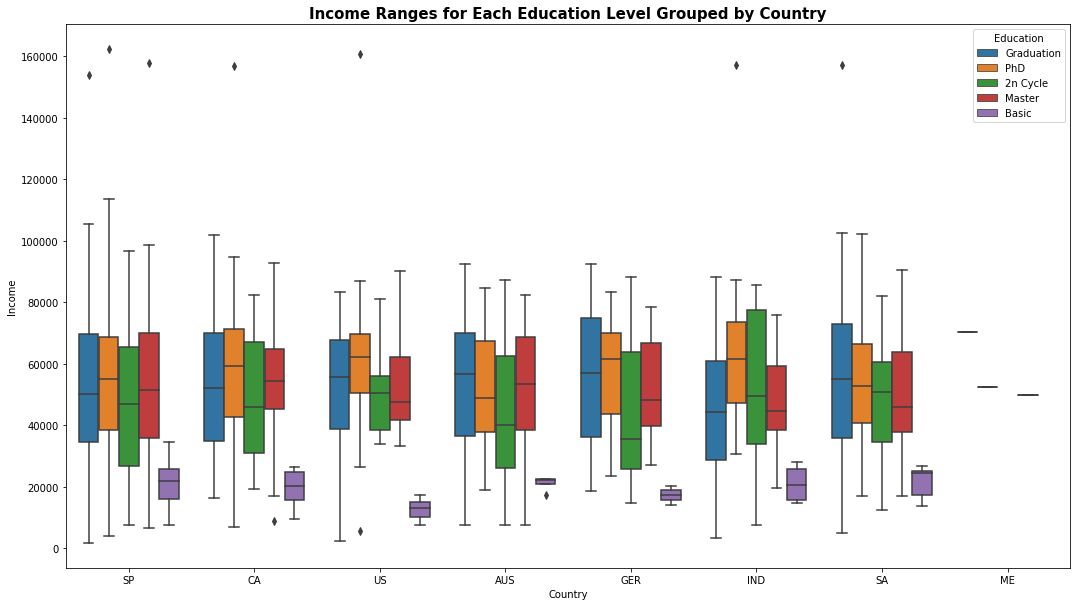

In [23]:
plt.figure(figsize=(18,10))
sns.boxplot(x='Country', y='Income', hue='Education',data=data)
plt.title("Income Ranges for Each Education Level Grouped by Country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

According to some research, `2n Cycle` represents the education level after bachelors. This is equivalent to a Masters. 

In the American education system, the education levels are as follows (highest to lowest):
1. PhD. or Advanced Degree
2. Masters
3. Undergraduate: Bachelors/Associates
4. Highschool and below

What can we conclude from the graph above?
1. PhD has a higher (older) age range compared to Graduation, except in Germany.
2. Basic has a lowest (younger) age range, except in Australia and India.
3. Graduation has a wide income range.

**Now, how can we group certain values?**
1. `PhD` will stay as is.
2. `Graduation` can either mean `Work in progress` or be changed to `Undergraduate`.
3. `2n Cycle` will be grouped with `Master`.
4. `Basic` will stay as is.

In [24]:
education_map = {"Graduation":"Undergraduate", "2n Cycle":"Master", "PhD":"PhD", "Basic":"Basic", "Master":"Master"}

data['New_Education'] = data['Education'].map(education_map, na_action='ignore')

In [25]:
data['New_Education'].value_counts(dropna=False)

Undergraduate    1115
Master            563
PhD               480
Basic              54
Name: New_Education, dtype: int64

In [26]:
data['Education'].value_counts(dropna=False)

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [27]:
data['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

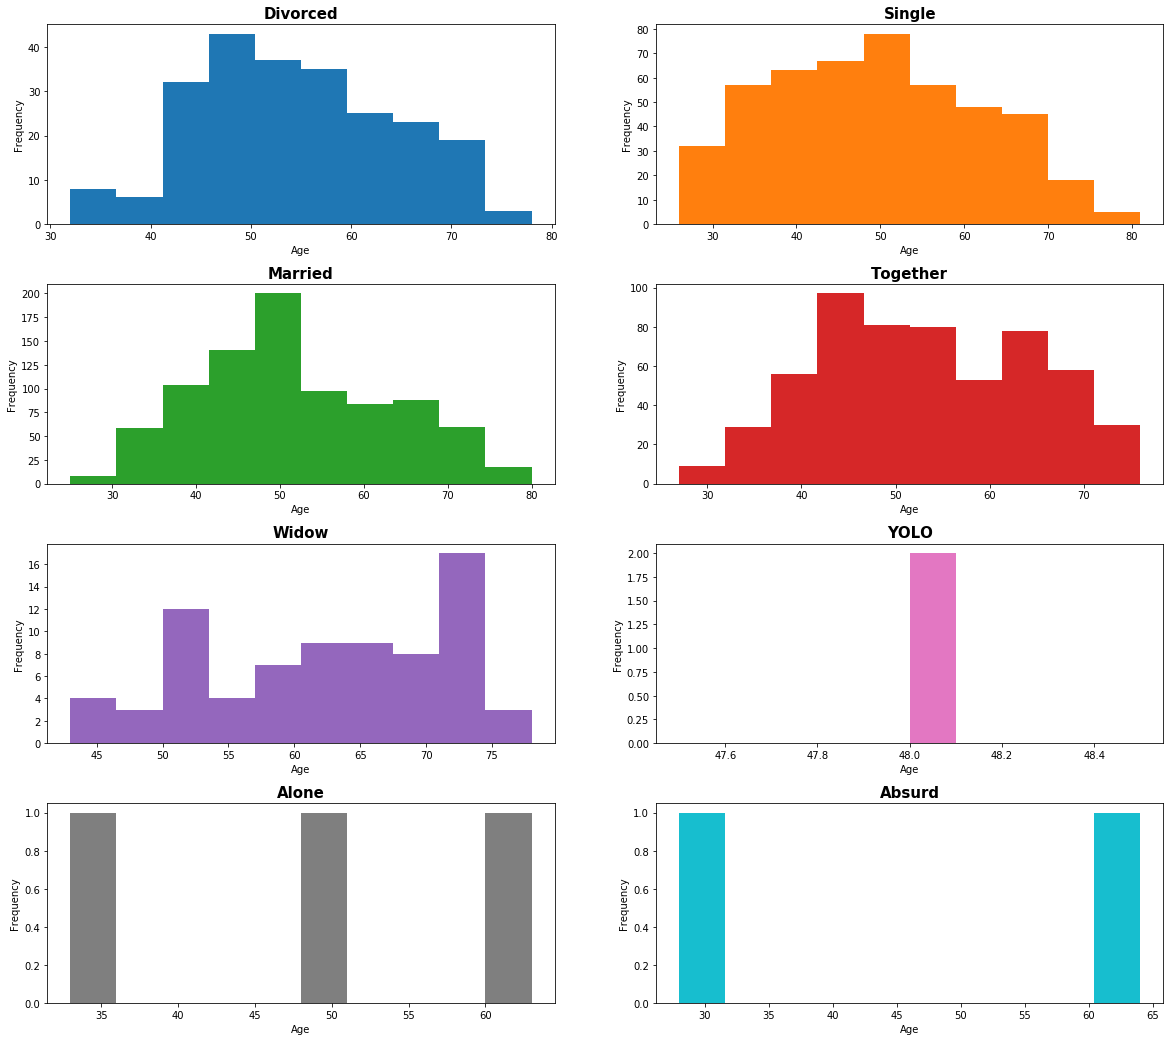

In [28]:
rows = 4
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(20,18))
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:pink','tab:gray','tab:cyan']

counter = 0
unique_vals = data['Marital_Status'].unique()

for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ax.hist(data[data['Marital_Status'] == unique_vals[counter]]['Age'],
                color=colors[counter])
        ax.set_title('{}'.format(unique_vals[counter]), fontdict={'fontsize':15, 'fontweight':'bold'})
        ax.set_xlabel('Age')
        ax.set_ylabel('Frequency')
        plt.subplots_adjust(hspace=0.3)

        counter+=1

For marital status, it is legally defined. The values `Married`, `Single`, `Divorced`, and `Widow` are all acceptable values.

- `Together` can mean they are in a relationship, but they are not married. With the wide age distribution above and legally, we'll classify this as `Single`.
- `Alone` will be classified as `Single`.
- `Absurd` and `YOLO` will be classified as the mode of the values.

In [29]:
data['Marital_Status'].mode()

0    Married
dtype: object

In [30]:
marital_map = {'Divorced':'Divorced', 'Single':'Single', 'Married':'Married', 'Together':'Single', 
               'Widow':'Widow', 'YOLO':'Married', 'Alone':'Single', 'Absurd':'Married'}

data['New_Marital_Status'] = data['Marital_Status'].map(marital_map)

In [31]:
data['New_Marital_Status'].value_counts(dropna=False)

Single      1044
Married      861
Divorced     231
Widow         76
Name: New_Marital_Status, dtype: int64

In [32]:
data['Marital_Status'].value_counts(dropna=False)

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

### Feature engineering

Altering variables, usually, to make the data be usable by machine learning models. In this case, we will perform a few to make them easier to understand.

In [33]:
# Total number of dependents in the household
data['Dependents'] = data['Kidhome'] + data['Teenhome']

# How long the person has been a customer in days
data['Customer_duration_days'] = datetime.datetime.now() - data['Dt_Customer']
data['Customer_duration_days'] = data['Customer_duration_days'].apply(lambda x: x.days)

# Total number of marketing campaigns the customer has accepted
data['TotalCmpAccept'] = data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                               'AcceptedCmp1','AcceptedCmp2', 'Response']].sum(axis=1)

### Trends within the data

To uncover any trends within the data, we'll start off by seeing if there are any correlations between each numeric variable.

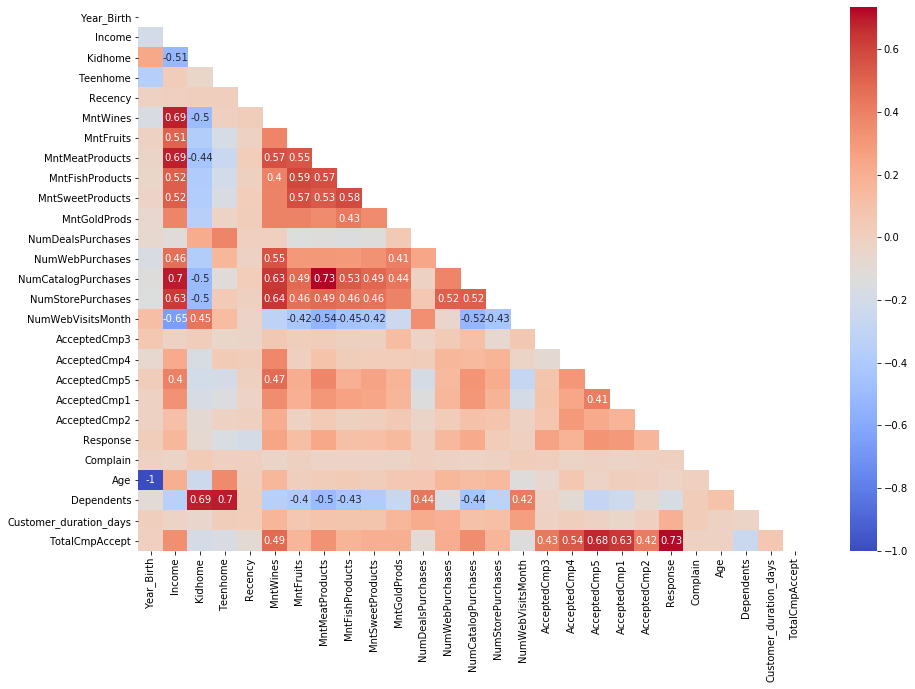

In [34]:
fig = plt.figure(figsize=(15,10))

corr = data.drop('ID', axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.4:
        t.set_text(t.get_text()) #if the value is greater than 0.4 or less than -0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

### Insights
The heatmap above shows the correlation that is either above 0.4 or below -0.4, meaning whether or not they are positively or negatively correlated.

**Observations:**
- All products, besides Gold products, are positively correlated with income. Wine and meat having the strongest correlation of 0.69.
- Catalog purchases is positively correlated (0.7) with income 
- Number of website visits per month is negatively correlated (-0.65) with income
- Number of dependents is negatively correlated with fruit, meat, and fish products (-0.4, -0.5, -0.43)
- Positive correlation for products: 
    - Meat with wine, meat with fruit, 
    - Fish with wine, fish with fruit, fish with meat
    - Sweet with fruit, sweet with meat, sweet with fish
    - Gold with fish
- Web purchases with income (0.46), wine (0.55), gold (0.41)
- Catalog purchases with income (0.7), wine 0.63, fruit .49, meat .73, fish .53, sweet .49, gold .44
- Campaign 5 has a slight positive correlation with income and wine
- Campaign 1 has a slight positive correlation with campaign 5
- Number of dependents has a negative correlation with all the products, stronger with fruits, meats, and fish.
- total campaigns accepted has a slight positive correlation with wines 0.49

**We can assume that:**
- People who make catalog purchases, they are likely to purchase at least one of the products.
- People who make store purchases, they are less likely to purchase gold products compared to the other products.
- Marketing campaign 1 and 5 have similar elements in which they targeted generally the same type of customer.
- Marketing campaign 5 catered towards people with higher income and/or people who like wine.
- Since the correlation with dependents and the products have a negative relationship, maybe this store does not cater towards families?

### Dependents Trends
1. Does the amount of total products bought vary between the number of dependents a customer has?
2. Does the type of purchase vary between the number of dependents a customer has?

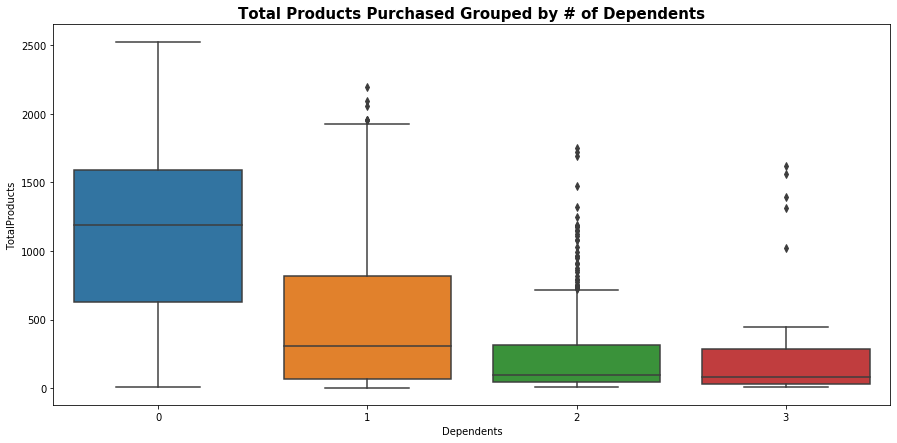

In [35]:
data['TotalProducts'] = data[['MntWines', 'MntFruits','MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis=1)
plt.figure(figsize=(15,7))
sns.boxplot(x='Dependents', y='TotalProducts', data=data)
plt.title("Total Products Purchased Grouped by # of Dependents", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

### Insights
From the boxplots above, we can see that the total number of products a customer bought decreased as the number of dependents increased (negative correlation). 

### Action
Dependent on our goal, we can either look into what kind of products the people with 0-1 dependent(s) are buying and improve marketing, increase inventory, or introduce more complements to increase sales.

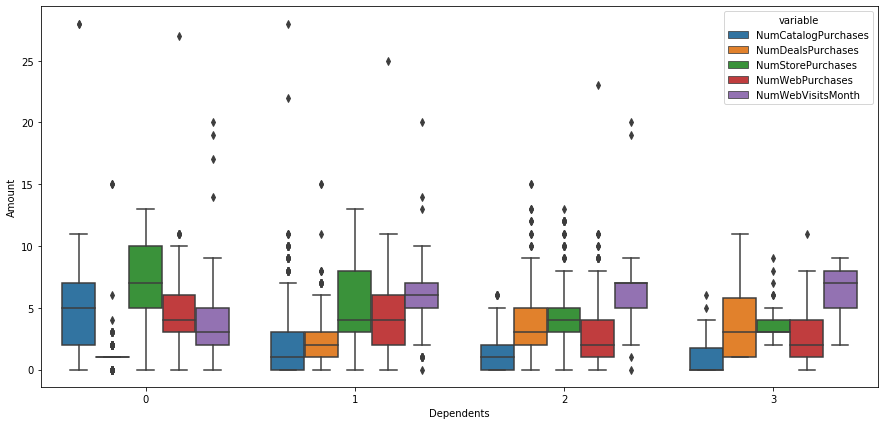

In [36]:
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                 'NumStorePurchases', 'NumWebVisitsMonth']
df = pd.melt(data,
             id_vars='ID',
             value_vars=purchase_cols,
             value_name='Amount')

dependents_df = data[['ID','Dependents']]

purch_v_depend = df.merge(dependents_df, how='inner', left_on='ID', right_on='ID').sort_values('variable')

plt.figure(figsize=(15,7))
sns.boxplot(x='Dependents', y='Amount', hue='variable', data=purch_v_depend)

plt.show()

### Insights
With the boxplots above, we an see that catalog purchases and store purchases decreased when the number of dependents increased. Web purchases stayed relatively the same across the number of dependents. One reason that may cause this is that customers with more children to take care of, they do not have the time to visit a store or go through a catalog to make purchases. The website may be more convenient for them.

Interestly enough, web site visits per month AND the number of deals purchased increased as the number of dependents increased (positive correlation). Either this proves what I said in the statement above or the dependents are the ones visiting the website. We have no way to confirm this as we have no website user data. 

### Action
If we are trying to improve the number of catalog purchases, we can give deals to products that customers with more dependents are likely to buy. What are these products? This requires further analysis. 

If we are trying to improve the number of store purchases, we can change the layout of the store to put more popular products in the front or have exclusive in-store products.

### Marketing Campaign Trends
1. For the people who accept each campaign, what are their incomes?
2. Where are these campaigns being accepted?
3. Products vs accepted the campaign. Can we decipher what products are associated with each campaign?

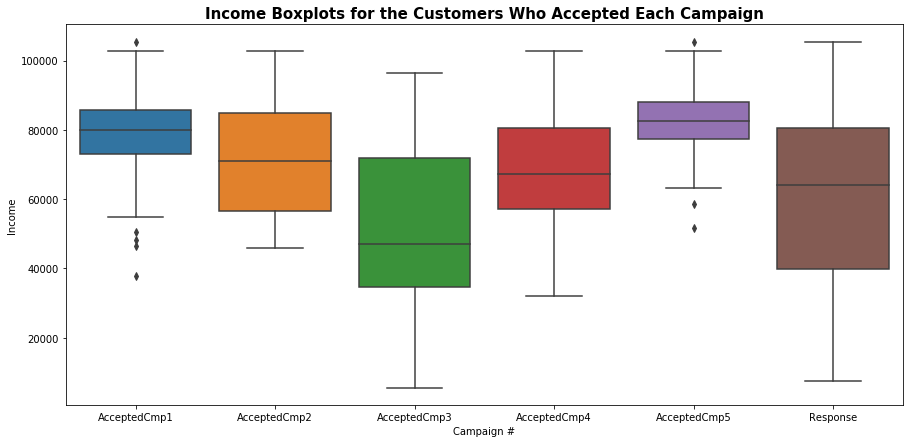

In [37]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
df = pd.melt(data, 
             id_vars='ID', 
             value_vars=campaign_cols,
             var_name='Campaign #')

accepted_cmp_df = df[df['value']==1]
income_df = data[['ID','Income']]

cmp_v_income = accepted_cmp_df.merge(income_df, how='inner', left_on='ID', right_on='ID').sort_values('Campaign #')

plt.figure(figsize=(15,7))
sns.boxplot(x='Campaign #', y='Income', data=cmp_v_income)
plt.title("Income Boxplots for the Customers Who Accepted Each Campaign", 
          fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

### Insights
With the boxplots above, we can see that in fact customers who accepted campaign 1 and campaign 5 have similar income ranges. Similarly for customers who accepted campaign 2 and campaign 4. Customers for campaigns 3 and 6 (Response) cover a wider income range.

### Action
Dependent on the audience for each marketing campaign, we can use this insight about the marketing campaign to better replicate a more successful campaign. 

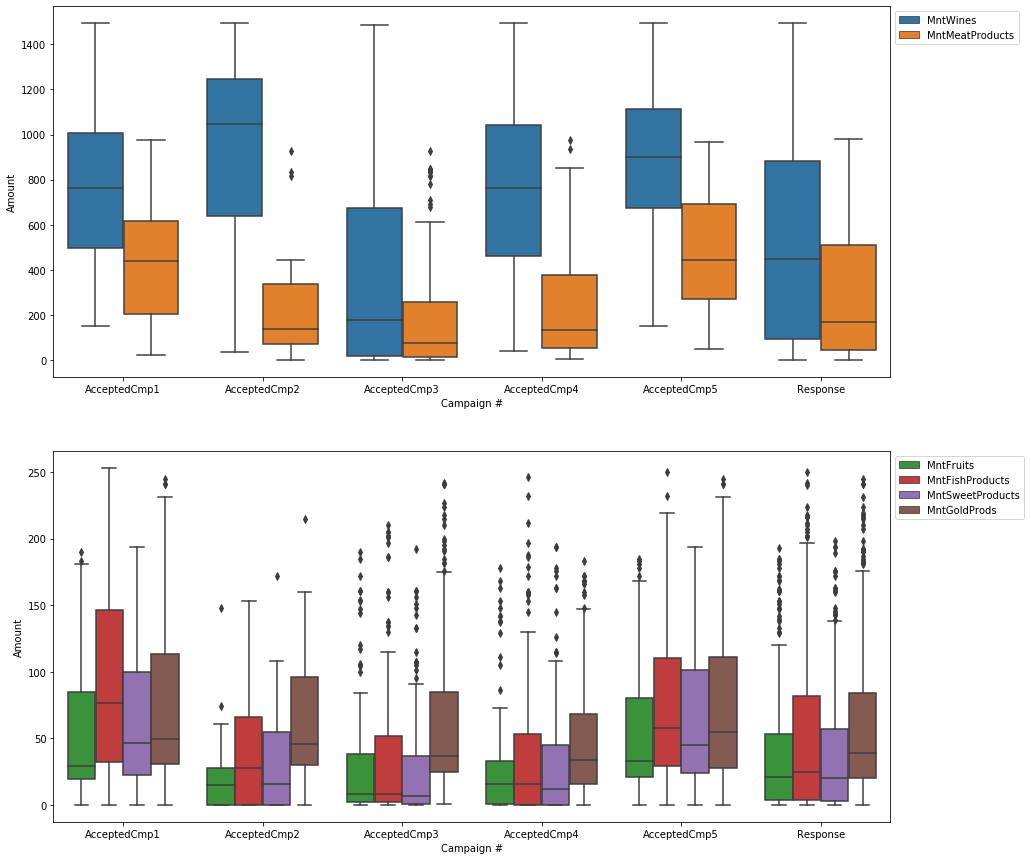

In [38]:
product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
campaign_df = data.melt(id_vars='ID',
                        value_vars=campaign_cols, 
                        var_name='Campaign #', 
                        value_name='Accepted')
product_df = data[['ID', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]

cmp_acc_df = campaign_df[campaign_df['Accepted'] == 1]

cmp_v_prod = cmp_acc_df.merge(product_df, how='inner', left_on='ID', right_on='ID').sort_values('Campaign #')
cmp_v_prod
final_cmp_prod = cmp_v_prod.melt(id_vars=['ID', 'Campaign #'],
                                 value_vars=product_cols,
                                 var_name='Product',
                                 value_name='Amount')

meat_wine = final_cmp_prod[final_cmp_prod['Product'].isin(['MntWines', 'MntMeatProducts'])]
all_other_prod = final_cmp_prod[~final_cmp_prod['Product'].isin(['MntWines', 'MntMeatProducts'])]

########################

fig, axes = plt.subplots(2,1,figsize=(15,15))

sns.boxplot(x='Campaign #', y='Amount', hue='Product', data=meat_wine, 
            ax=axes[0])
sns.boxplot(x='Campaign #', y='Amount', hue='Product', data=all_other_prod, 
            palette=['tab:green','tab:red', 'tab:purple','tab:brown'],
            ax=axes[1])
axes[0].legend(bbox_to_anchor=(1,1))
axes[1].legend(bbox_to_anchor=(1,1))

plt.show()

### Insights
For the people who accepted campaign #2, bought the largest amount of wine (per customer), keep in mind only 30 customers accepted campaign #2 out of the 2000. Campaign #5 and #1 seem to be the top campaigns across all products. But, the overarching question is why did many people not accept campaign #2? What made campaign #5 and #1 successful?

Overview of the boxplots:
- Campaign #1 made people buy fish products more
- Campaign #2 made people buy wine products more
- Campaign #3 didn't necessarily improve any sales
- Campaign #4 didn't necessarily improve any sales
- Campaign #5 made a slight increase in all products, but not the most
- Response or Campaign #6 made a slight decrease in all products from Campaign #5, but not the worst

### Action
Further analyze what made campaign #2 have more wine products sell and how campaign #1 and #5 were more successful compared to the other campaigns. Also, what went wrong in campaign #3?

# 2. Statistical Analysis
Please run statistical tests in the **form of regressions** to answer these questions and propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

**Questions we'll be answering**:

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

## What factors are significantly related to the number of store purchases?
To do this in a form of a regression, we will perform a linear regression with certain factors. Our model will predict how many store purchases a customer will make based on the given factors. To figure out what factors are significantly related, anything less than the p-value of 0.05 will be significant. We can also assess the accuracy of our model with an error metric, RMSE.

**Steps to perform linear regression**:
1. Visualize the distribution of the target variable (`NumStorePurchases`)
2. Drop features that have no utility, cause data leakage, and highly correlated features with each other
3. Create dummy columns for categorical features
4. Perform linear regression with 70/30 train test split
5. Feature selection
6. Perform linear regression with X best features 70/30 train test split
7. Report results

### Distribution of the target variable

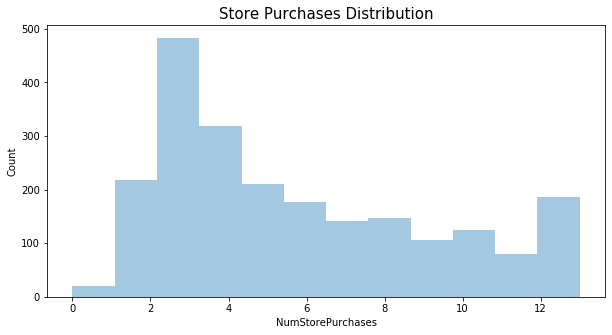

In [39]:
lr_df = data.copy()
plt.figure(figsize=(10,5))
sns.distplot(lr_df['NumStorePurchases'], kde=False,hist=True, bins=12)
plt.title("Store Purchases Distribution", size=15)
plt.ylabel("Count")

plt.show()

### Dropping columns for our model
We'll drop `ID`, `Year_Birth`, `Education`, `Marital_Status`, `Kidhome`, `Teenhome`, and, `Dt_Customer` because we either created new columns for them and/or there is no arbitary meaning (ex. `ID`).

In [40]:
lr_df = lr_df.drop(['ID','Year_Birth','Education','Marital_Status','Kidhome','Teenhome','Dt_Customer'], axis=1)

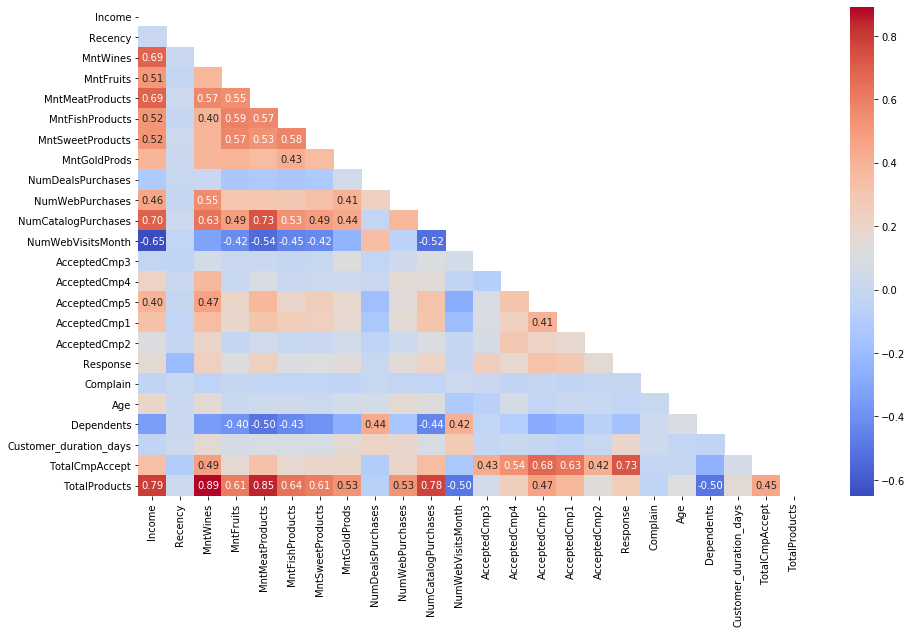

In [41]:
plt.figure(figsize=(15,9))                       
                       
corr = lr_df.drop('NumStorePurchases', axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.4:
        t.set_text(t.get_text()) #if the value is greater than 0.4 or less than -0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

# Do the independent variables need no correlation with each other? That's one of the assumptions when
## performing a linear regression.

### Creating dummy columns for categorical variables
We will create dummy columns for `Country`, `New_Education`, and `New_Marital_Status`.

In [42]:
categorical_df = lr_df.select_dtypes(exclude='number')

dummy_df = pd.DataFrame()
for col in categorical_df.columns:
    dummy = pd.get_dummies(categorical_df[col], prefix=col)
    dummy_df = pd.concat([dummy_df, dummy], axis=1)
    
lr_df = pd.concat([lr_df, dummy_df], axis=1)
lr_df.drop(categorical_df.columns, axis=1, inplace=True)

In [43]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Income                       2212 non-null   float64
 1   Recency                      2212 non-null   int64  
 2   MntWines                     2212 non-null   int64  
 3   MntFruits                    2212 non-null   int64  
 4   MntMeatProducts              2212 non-null   int64  
 5   MntFishProducts              2212 non-null   int64  
 6   MntSweetProducts             2212 non-null   int64  
 7   MntGoldProds                 2212 non-null   int64  
 8   NumDealsPurchases            2212 non-null   int64  
 9   NumWebPurchases              2212 non-null   int64  
 10  NumCatalogPurchases          2212 non-null   int64  
 11  NumStorePurchases            2212 non-null   int64  
 12  NumWebVisitsMonth            2212 non-null   int64  
 13  AcceptedCmp3      

### Perform linear regression with all features

In [44]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [45]:
# x_train, x_test, y_train, y_test = train_test_split(lr_df[lr_df.drop('NumStorePurchases',axis=1).columns],
#                                                     lr_df['NumStorePurchases'], 
#                                                     test_size=0.3,
#                                                     random_state=42)

# lr = LinearRegression(normalize=True)

# lr.fit(x_train, y_train)
# test_predictions = lr.predict(x_test)
# mse = mean_squared_error(y_test, test_predictions)
# rmse = np.sqrt(mse)
# score = lr.score(x_test, y_test)

# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"Score: {score}")

In [46]:
# importance_coef = lr.coef_
# for i,v in enumerate(importance_coef):
#     print('Feature: %0d, Score: %.5f' % (i,v))

### Standardizing the numeric values for our LR model

The reason we are standardizing rather than normalizing our values is because we are using a linear regression model, which assumes our data has a Gaussian distribution (bell curve).

In [47]:
# from sklearn import preprocessing

# x = lr_df.values
# standard_scaler = preprocessing.StandardScaler()
# x_scaled = standard_scaler.fit_transform(x)

# test_df = pd.DataFrame(x_scaled)
# test_df.columns = lr_df.columns

In [48]:
# x_train, x_test, y_train, y_test = train_test_split(test_df[test_df.drop('NumStorePurchases',axis=1).columns],
#                                                     test_df['NumStorePurchases'], 
#                                                     test_size=0.3,
#                                                     random_state=42)

# lr = LinearRegression(normalize=True)

# lr.fit(x_train, y_train)
# test_predictions = lr.predict(x_test)
# mse = mean_squared_error(y_test, test_predictions)
# rmse = np.sqrt(mse)
# score = lr.score(x_test, y_test)

# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"Score: {score}")

In [49]:
# importance_coef = lr.coef_
# for i,v in enumerate(importance_coef):
#     print('{}, Score: {:.5f}'.format(test_df.columns[i],v))

### OLS Regression

In [50]:
x_train, x_test, y_train, y_test = train_test_split(lr_df[lr_df.drop('NumStorePurchases',axis=1).columns],
                                                    lr_df['NumStorePurchases'], 
                                                    test_size=0.3,
                                                    random_state=42)

# lr = LinearRegression(normalize=True)
# lr.fit(x_test, y_test)

x_test = sm.add_constant(x_test)

model = sm.OLS(y_test, x_test).fit()
predictions = model.predict(x_test)

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     29.64
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.23e-109
Time:                        10:27:53   Log-Likelihood:                -1421.1
No. Observations:                 664   AIC:                             2914.
Df Residuals:                     628   BIC:                             3076.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

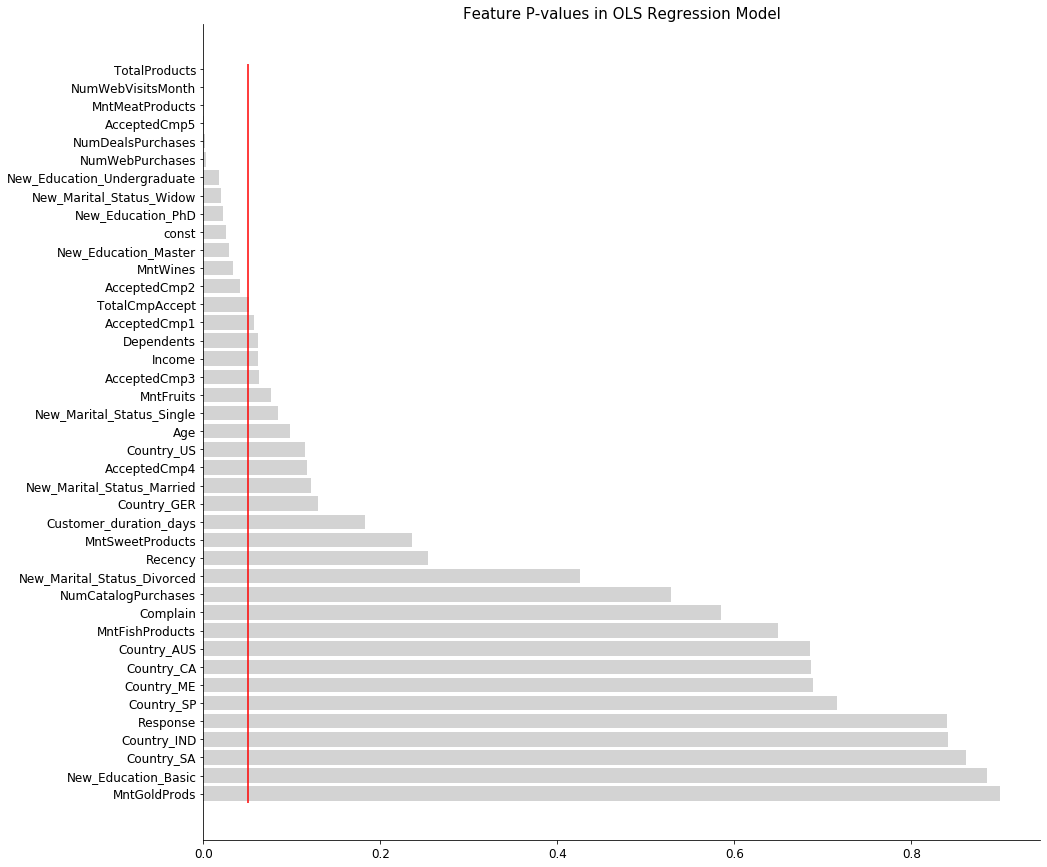

In [51]:
p_values = pd.Series(model.pvalues).sort_values(ascending=False)

plt.figure(figsize=(15,15))
plt.barh(y=p_values.index, width=p_values, color='lightgrey',)
plt.vlines(x=0.05, ymin=-0.5, ymax=40.25, colors='red')
sns.despine(right=True)
plt.title("Feature P-values in OLS Regression Model", size=15)
plt.yticks(size=12)
plt.xticks(size=12)


plt.show()

### Insights
From our OLS regression model with all the features, the following are the significant features:
1. `Total Products` 
- `NumWebVisitsMonth`
- `MntMeatProducts` 
- `AcceptedCmp5` 
- `NumDealsPurchases`
- `NumWebPurchases`
- `New_Education_Undergraduate` 
- `New_Marital_Status_Widow` 
- `New_Education_PhD` 
- `New_Education_Master`
- `MntWines` 
- `AcceptedCmp2`

Let's perform the model again and see what R-squared value we get. (This explains the accuracy of our model)

### OLS Regression with significant features

In [52]:
significant_features = p_values[p_values < 0.05].drop('const').index

x_train, x_test, y_train, y_test = train_test_split(lr_df[significant_features],
                                                    lr_df['NumStorePurchases'], 
                                                    test_size=0.3,
                                                    random_state=42)

# lr = LinearRegression(normalize=True)
# lr.fit(x_test, y_test)

x_test = sm.add_constant(x_test)

model = sm.OLS(y_test, x_test).fit()
predictions = model.predict(x_test)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     79.05
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.95e-118
Time:                        10:27:54   Log-Likelihood:                -1446.4
No. Observations:                 664   AIC:                             2919.
Df Residuals:                     651   BIC:                             2977.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [53]:
p_values = pd.Series(model.pvalues)
p_values[p_values < 0.05].drop('const').sort_values()

NumWebVisitsMonth    7.018589e-15
AcceptedCmp5         1.459059e-09
TotalProducts        3.268842e-08
MntMeatProducts      4.548434e-06
NumWebPurchases      5.423278e-05
NumDealsPurchases    9.845733e-03
dtype: float64

### Linear regression and use Permutation Importance

**What is permutation importance?**
- It measures how the R2 decreases when a feature is not available in the model.
- How the algorithm works is it replaces 1 column's data and sees how the R2 changes. Repeat for each column.

In [54]:
# !pip install eli5

In [55]:
import eli5
from eli5.sklearn import PermutationImportance

In [56]:
def permutation(x_train, x_test, y_train, y_test):
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    permuter = PermutationImportance(
        estimator = model, 
        scoring = 'r2', 
        n_iter = 5,
        random_state = 42)
    
    permuter.fit(x_test, y_test)
    
    columns = x_test.columns.to_list()
    feature_importance = permuter.feature_importances_
    
    results = eli5.show_weights(
        estimator = permuter,
        top = 10,
        feature_names = columns
    )
    return results

# Getting the features and target columns
all_features = lr_df.drop('NumStorePurchases',axis=1).columns
target = 'NumStorePurchases'

# Splitting out train and test/validation set
x_train, x_test, y_train, y_test = train_test_split(lr_df[all_features],
                                                    lr_df[target], 
                                                    test_size=0.3,
                                                    random_state=42)

# Getting the feature importance from our model
permutation(x_train, x_test, y_train, y_test)



Weight,Feature
0.4632 ± 0.0458,TotalProducts
0.1168 ± 0.0301,NumWebVisitsMonth
0.0749 ± 0.0181,MntMeatProducts
0.0622 ± 0.0114,NumWebPurchases
0.0520 ± 0.0174,Income
0.0431 ± 0.0267,NumDealsPurchases
0.0192 ± 0.0079,Dependents
0.0128 ± 0.0070,MntWines
0.0120 ± 0.0047,Response
0.0107 ± 0.0075,Customer_duration_days


### Insights
Right number is the variance from the left number (decrease). You wouldn't use this explanation method by itself, this is a supplemental tool to provide evidence for your model.

With performing the permutation importance above on our linear regression model, the following are our top 10 significant features for NumStorePurcahses:
1. Total Products
2. NumWebVisitsMonth
3. NumMeatProducts
- NumWebPurchases
- Income
- NumDealsPurcahses
- Dependents
- MntWines
- Response
- Customer_duration_days

### Interpreting the results
In other words, dependent on the direction of the relationship between the feature and the target (NumStorePurchases), the target will value will increase or decrease with that specific feature.

For an example, the more products a customer bought, the more in-store purchases the customer would have made. Another example being the more website visits per month a customer has, the fewer in-store purchases that customer has. It is important to note that this technique and model does not imply a direct causation, but rather it provides evidence that there is a strong relationship between the feature and the target.

## Does US fare significantly better than the Rest of the World in terms of total purchases?
Does the US spend more than the rest of the world in terms of total purchases?

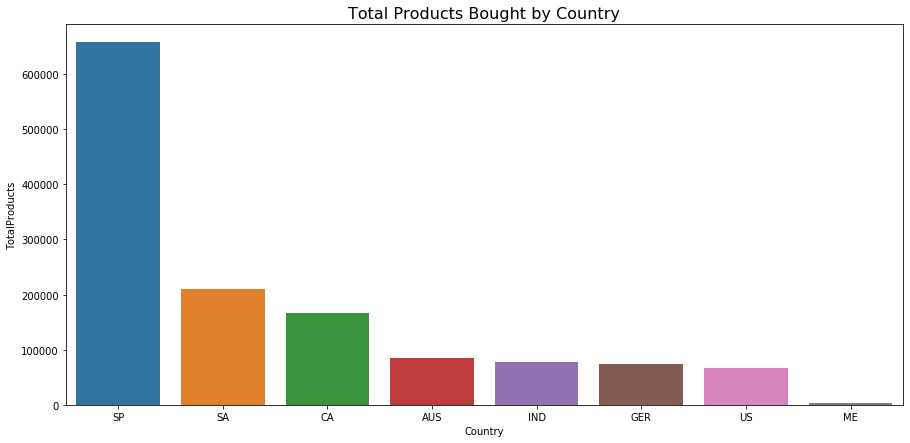

In [57]:
total_products = data.groupby('Country').sum().sort_values('TotalProducts', ascending=False)

fig = plt.figure(figsize=(15,7))
sns.barplot(x=total_products.index, y=total_products["TotalProducts"])
plt.title("Total Products Bought by Country", size=16)

plt.show()

### Insights
- Spain bought the most products
- US is second to last (out of 8)

### Interpreting the results
To answer our CMO's question, the US does not fare significantly better than the rest of the world in terms of total purchases.

## Are the people that buy gold products have more in-store purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.

How do you answer this?

Let's first check the Kendall correlation between the 2 variables. We are using Kendall correlation because the values in both columns are discrete and have some outliers. This measurement will tell us if there is a positive or negative relationship.

Next, we'll use the p-value to check if the relationship is statistically significant. In other words, what are the chances that the relationship occurred by chance?

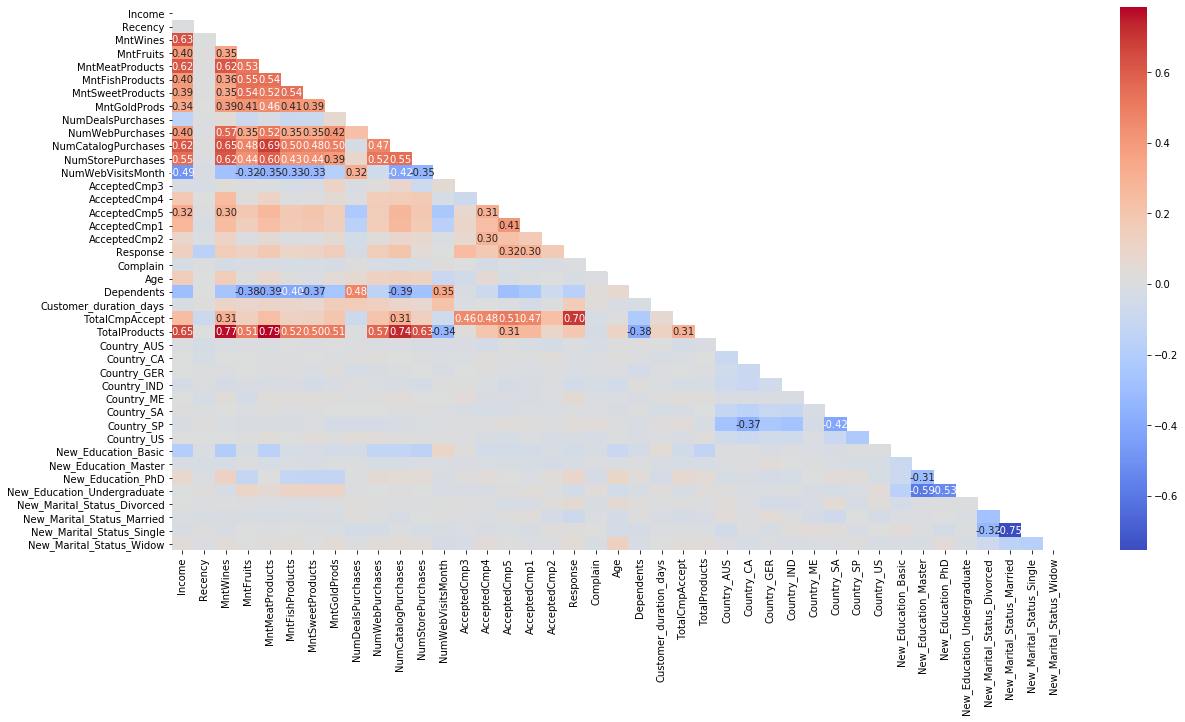

In [58]:
plt.figure(figsize=(20,10))                       
                       
corr = lr_df.corr(method='kendall')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.3:
        t.set_text(t.get_text()) #if the value is greater than 0.4 or less than -0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()

In [59]:
from scipy.stats import pearsonr

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 100)
    return pvalues


kendall_corr = corr['MntGoldProds']['NumStorePurchases']
p_value = calculate_pvalues(lr_df)['MntGoldProds']['NumStorePurchases']

print("Kendall correlation: {}".format(kendall_corr))
print("Kendall p-value: {}".format(p_value))




Kendall correlation: 0.39267853356399673
Kendall p-value: 1.4167753847176173e-81


### Insights
For `MntGoldProds` and `NumStorePurchases`:
- Kendall correlation: 0.39
- Kendall p-value: 1.41e-81

### Interpreting the results
There is a moderate positive correlation with `MntGoldProds` and `NumStorePurchases`. When the amount of gold products bought goes up, the number of store purchases will go up as well. (This does not imply causation) And the chances of this relationship happening by random chance is close to 0, so this supports our claim about the positive correlation.

## Do "Married PhD Candidates" have a significant relation with amount spent on fish?

Steps to answer the first question:
1. Boxplots for Married PhD Candidates vs all others
2. Do the same thing as last question

In [60]:
def change_marital_status(df):
    if df['New_Education'] == 'PhD':
        if df['New_Marital_Status'] == 'Married':
            return 'Married PhD'
        else:
            return 'Others'
    else:
        return 'Others'
phd_married = data.copy()
phd_married['Changed_Marital_Status'] = phd_married.apply(change_marital_status, axis=1)

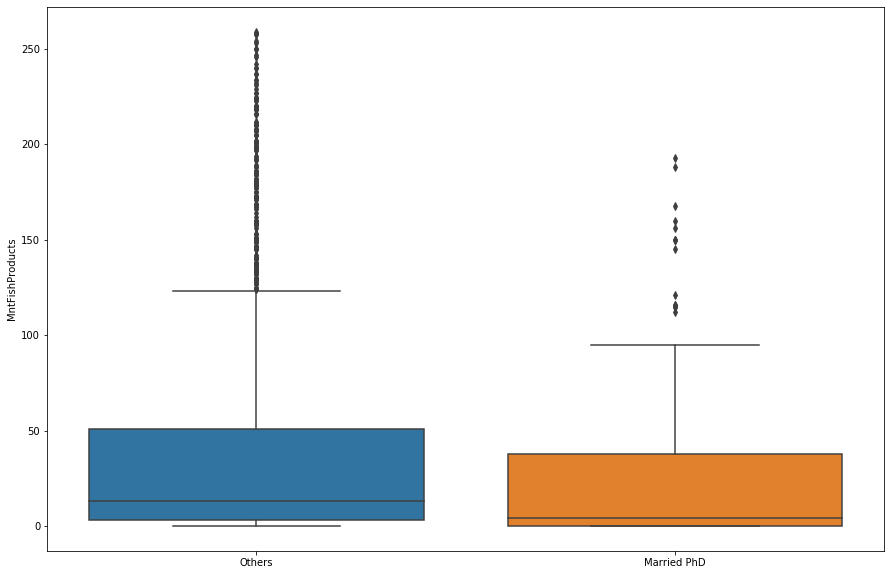

In [61]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(x='Changed_Marital_Status', y='MntFishProducts', data=phd_married)
plt.xlabel("")

plt.show()

In [62]:
def get_dummy_cols(df):
    categorical_df = df.select_dtypes(exclude='number')

    dummy_df = pd.DataFrame()
    for col in categorical_df.columns:
        dummy = pd.get_dummies(categorical_df[col], prefix=col)
        dummy_df = pd.concat([dummy_df, dummy], axis=1)

    df = pd.concat([df, dummy_df], axis=1)
    df.drop(categorical_df.columns, axis=1, inplace=True)
    
    return df
phd_married_dummy = get_dummy_cols(phd_married)
corr = phd_married_dummy.corr(method='kendall')

kendall_corr = corr['MntFishProducts']['Changed_Marital_Status_Married PhD']
p_value = calculate_pvalues(phd_married_dummy)['MntFishProducts']['Changed_Marital_Status_Married PhD']

In [63]:
print("Kendall correlation: {}".format(kendall_corr))
print("Kendall p-value: {}".format(p_value))

Kendall correlation: -0.07736395270110807
Kendall p-value: 0.0038893426849237584


### Insights
For `MntFishProducts` and those who are Married and have a PhD:
- Kendall correlation: -0.077
- Kendall p-value: 0.0038

### Interpreting the results
There's little to no correlation with those variables, meaning that whoever is married and has a PhD, we can't assume the number of fish products that customer is going to buy. With the p-value above, the relationship is statistically significant (p < 0.05) so this further supports our claim above.

## What other factors are significantly related to amount spent on fish?

### Distribution of MntFishProducts

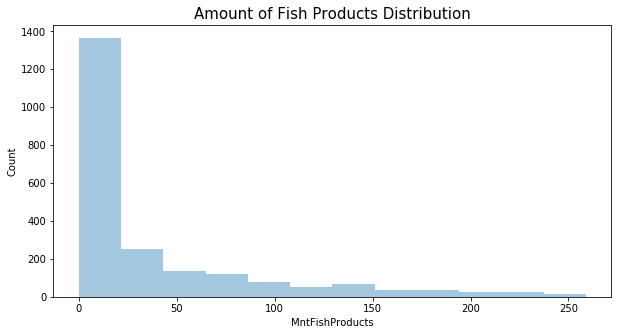

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(lr_df['MntFishProducts'], kde=False,hist=True, bins=12)
plt.title("Amount of Fish Products Distribution", size=15)
plt.ylabel("Count")

plt.show()

### Check for correlation between variables

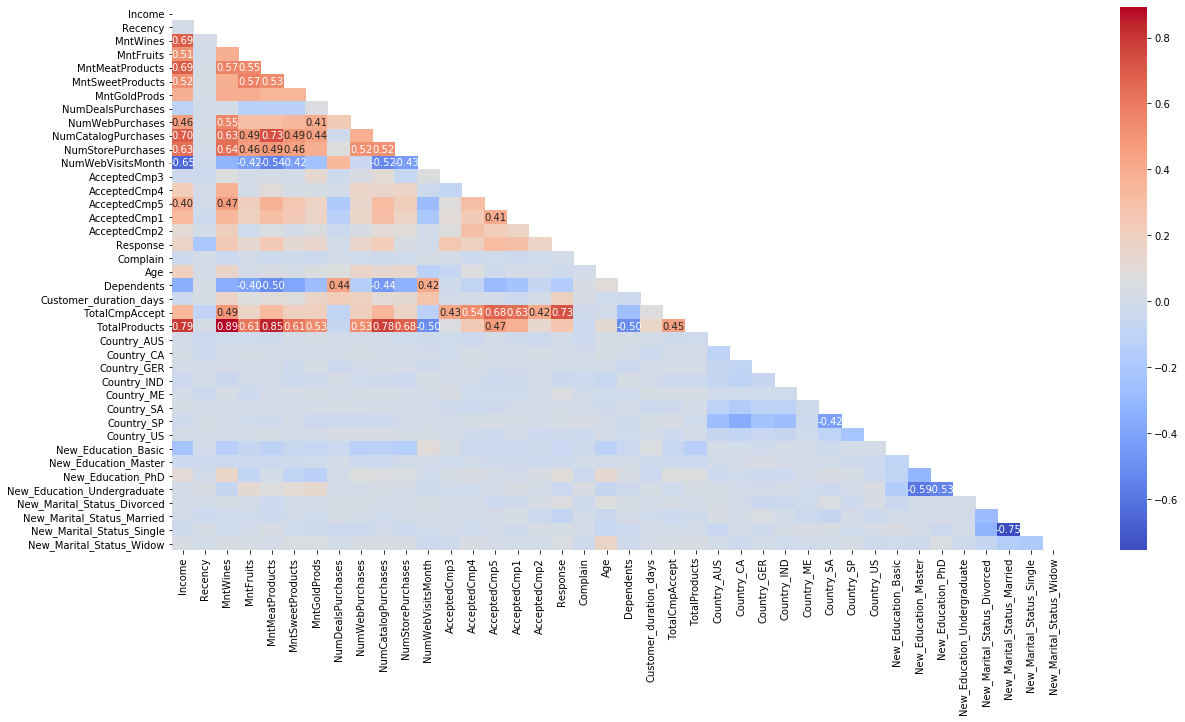

In [65]:
plt.figure(figsize=(20,10))                       
                       
corr = lr_df.drop('MntFishProducts', axis=1).corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.4:
        t.set_text(t.get_text()) #if the value is greater than 0.4 or less than -0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text


plt.show()
# Do the independent variables need no correlation with each other? That's one of the assumptions when
## performing a linear regression.

### Linear regression and permutation importance on `MntFishProducts`

In [66]:
# x = lr_df.values
# standard_scaler = preprocessing.StandardScaler()
# x_scaled = standard_scaler.fit_transform(x)

# test_df = pd.DataFrame(x_scaled)
# test_df.columns = lr_df.columns

In [67]:
# # Getting the features and target columns
# all_features = test_df.drop('MntFishProducts',axis=1).columns
# target = 'MntFishProducts'

# # Splitting out train and test/validation set
# x_train, x_test, y_train, y_test = train_test_split(test_df[all_features],
#                                                     test_df[target], 
#                                                     test_size=0.3,
#                                                     random_state=42)
# lr = LinearRegression()

# lr.fit(x_train, y_train)
# test_predictions = lr.predict(x_test)
# mse = mean_squared_error(y_test, test_predictions)
# rmse = np.sqrt(mse)
# score = lr.score(x_test, y_test)

# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"Score: {score}")

In [68]:
# Getting the features and target columns
all_features = lr_df.drop('MntFishProducts',axis=1).columns
target = 'MntFishProducts'

# Splitting out train and test/validation set
x_train, x_test, y_train, y_test = train_test_split(lr_df[all_features],
                                                    lr_df[target], 
                                                    test_size=0.3,
                                                    random_state=42)
lr = LinearRegression()

lr.fit(x_train, y_train)
test_predictions = lr.predict(x_test)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
score = lr.score(x_test, y_test)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"Score: {score}")

MSE: 2.6226214838569742e-25
RMSE: 5.121153662854665e-13
Score: 1.0


In [69]:
def permutation(x_train, x_test, y_train, y_test):
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    permuter = PermutationImportance(
        estimator = model, 
        scoring = 'r2', 
        n_iter = 5,
        random_state = 42)
    
    permuter.fit(x_test, y_test)
    
    columns = x_test.columns.to_list()
    feature_importance = permuter.feature_importances_
    
    results = eli5.show_weights(
        estimator = permuter,
        top = 6,
        feature_names = columns
    )
    return results

# Getting the feature importance from our model
permutation(x_train, x_test, y_train, y_test)

### Insights
Right number is the variance from the left number (decrease). You wouldn't use this explanation method by itself, this is a supplemental tool to provide evidence for your model.

With performing the permutation importance above on our linear regression model, the following are our top 6 significant features for NumStorePurcahses:
1. `TotalProducts`
- `MntWines`
- `MntMeatProducts`
- `MntGoldProds`
- `MntSweetProducts`
- `MntFruits`

### Interpreting the results
The more products a customer has bought, the more likely they are to have bought fish products, wine and meat products being the most significant compared to the other products.

## Is there a significant relationship between geographical regional and success of a campaign?
To do this, we'll perform a binary logistic regression. Let's first get an overview of the campaign acceptance %.

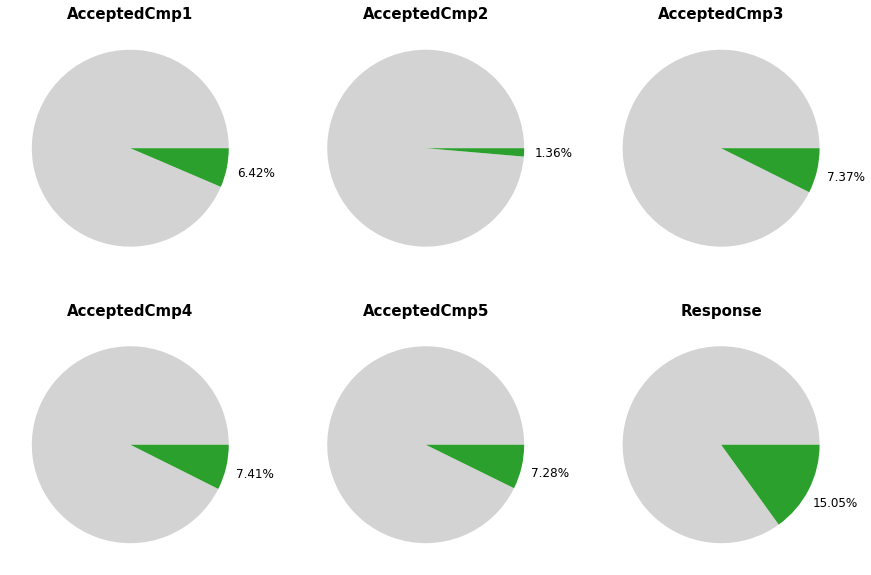

In [70]:
cmp_cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

def my_autopct(pct):
    return ('%.2f%%' % pct) if pct < 20 else ''

rows = 2
cols = 3
fig, axes = plt.subplots(rows,cols, figsize=(15,10))
counter = 0 
for i in range(rows):
    for j in range(cols):
        ax = axes[i][j]
        ax.pie(x=data[cmp_cols[counter]].value_counts()/data.shape[0],
               colors=['lightgrey','tab:green'],
               autopct=my_autopct, pctdistance=1.3,
               textprops={'fontsize': 12})
        ax.set_title("{}".format(cmp_cols[counter]), fontdict={'fontsize':15,'fontweight':'bold'})
        
        counter += 1

plt.show()

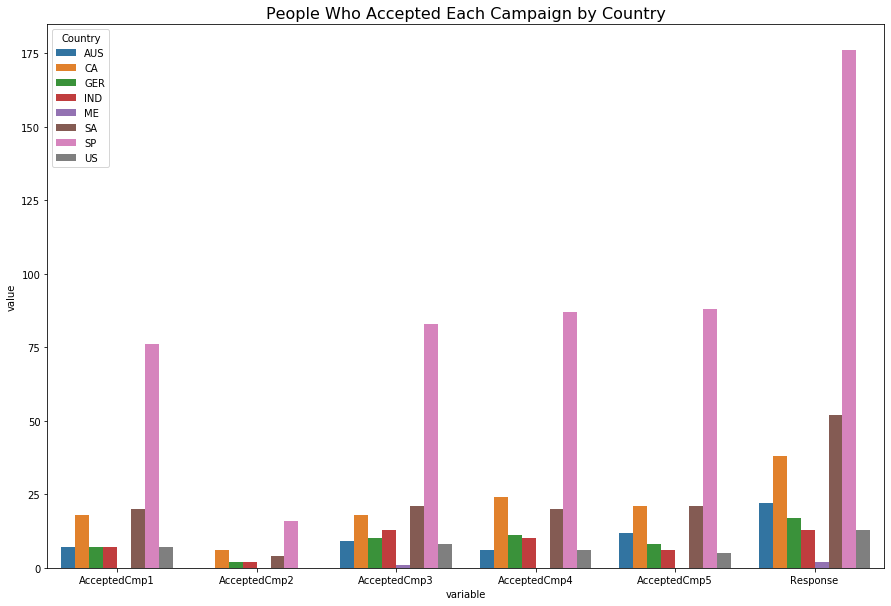

In [71]:
# Which country accepted the most campaigns?
country_cols = ['Country_AUS', 'Country_CA','Country_GER', 'Country_IND', 
                'Country_ME', 'Country_SA', 'Country_SP', 'Country_US']

cmp_melt_df = data.melt(id_vars='ID', value_vars=cmp_cols)
final_melt_df = cmp_melt_df.merge(right=data[['ID','Country']], how='inner', left_on='ID', right_on='ID')
final_df = final_melt_df.groupby(['variable','Country']).sum().reset_index()
####
plt.figure(figsize=(15,10))
sns.barplot(x='variable', y='value', hue='Country', data=final_df)
plt.title("People Who Accepted Each Campaign by Country", size=16)

plt.show()

### Insights
We can see that the most people accepted the campaign in Spain, compared to any other country. South Africa and Canada (relatively similar acceptance rate) come in at 2nd and 3rd. 

But is this relationship statistically significant? We'll perform a Chi-Square test of independence for each country and campaign to find out. 

**Since we are trying to find the relationship between categorical variables (country and campaign acceptances), we'll perform a logistic regression.**

### Chi-Square Test of Independence
- Ho: There is no association between campaign acceptance and country. (They are independent)
- Ha: There is an association between campaign acceptance and country. (They are not independent)

With a significance level of alpha = 0.05.


In [72]:
test = data[['Country', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

a = test.groupby('Country').sum()

In [73]:
# By country, how many people did not accept the campaigns?
cmp_cols = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
not_acc_dict = {}
for c in test['Country'].unique():
    country = test[test['Country'] == c]
    country_dict = {}
    for col in cmp_cols:
        country_dict[col] = (country[col] == 0).sum()
    not_acc_dict[c] = country_dict
    
n_acc_cmp = pd.DataFrame.from_dict(not_acc_dict, orient='index').sort_index().add_prefix('N_') 

In [74]:
from scipy.stats import chisquare

chisq_cmp = {}
for ix, col in enumerate(a.columns):
    y_ser = a[col]
    n_ser = n_acc_cmp[n_acc_cmp.columns[ix]]
    
    # Combining the accepted counts with not accepted counts
    country = pd.concat([y_ser, n_ser], axis=1)
    observed = country.copy()
    
    # Getting the row totals for our contigency table
    country['row_totals'] = country.sum(axis=1)
    # Getting the column totals
    country = country.append(country.sum().rename('col_totals'))
    
    # Calculating the expected values for each cell
    expected = np.outer(country['row_totals'][0:8],
                        country.loc['col_totals'][0:2]) / 2212
    expected = pd.DataFrame(expected,
                            index=['AUS', 'CA', 'GER', 'IND', 'ME', 'SA', 'SP', 'US'],
                            columns=[col, n_acc_cmp.columns[ix]])
    
    # Perform chisquare stat test
    chisq, p = chisquare(observed, expected)
    chisq_cmp[col] = chisq, p


In [75]:
chisq_cmp

{'AcceptedCmp1': (array([2.10338416, 0.14429012]),
  array([0.95389719, 0.9999918 ])),
 'AcceptedCmp2': (array([5.34862955, 0.07353753]),
  array([0.61749911, 0.9999992 ])),
 'AcceptedCmp3': (array([4.5306223 , 0.36041554]),
  array([0.71702676, 0.99981426])),
 'AcceptedCmp4': (array([5.94827802, 0.47632695]),
  array([0.54580152, 0.99952863])),
 'AcceptedCmp5': (array([4.9333025 , 0.38725583]),
  array([0.66810249, 0.99976363])),
 'Response': (array([10.56223849,  1.87186025]),
  array([0.15888653, 0.96659082]))}

In [76]:
from scipy.stats import chi2_contingency

chisq_cmp = {}

for ix, col in enumerate(a.columns):
    y_ser = a[col]
    n_ser = n_acc_cmp[n_acc_cmp.columns[ix]]
    
    # Combining the accepted counts with not accepted counts
    country = pd.concat([y_ser, n_ser], axis=1)
    observed = country.copy()
    chi2, p, dof, expected = chi2_contingency(observed=observed)
    
    chisq_cmp[col] = {'chi_squared': chi2, 'p_value':p} 

In [77]:
pd.DataFrame(chisq_cmp)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
chi_squared,2.247674,5.422167,4.891038,6.424605,5.320558,12.434099
p_value,0.944871,0.608588,0.673258,0.491134,0.620907,0.087157


### Insights

According to the chi-square test of independence above, all p-values of the campaigns are above our significance level (alpha = 0.05), so we can say that there is no association between country and campaign (fail to reject our null hypothesis). 

### Logistic Regression with Each Marketing Campaign

Assumptions about logistic regression:
1. Binary logistic regression requires the dependent variable to be binary (Campaign acceptance)
2. Requires the observations to be independent of one another
3. Requires there to be little to no multicollinearity among the independent variables (Country)
4. Assumes linearity of independent variables and log odds
5. Requires a large sample size (General guideline is that you need at least 10 outcomes for each independent variable)

Steps to do so:
1. Dummy cols for country
2. Point Biserial correlation coefficient?
3. Perform logistic regression on each campaign
4. Display confusion matrix

In [78]:
country_dummy = get_dummy_cols(data)[['Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME',
                                      'Country_SA','Country_SP', 'Country_US']]

In [79]:
campaign_data = data[cmp_cols]

Model performance metrics for binary logistic regression:
- Accuracy
    - Total True Positive + Total True Negative / Total Predicted
- Precision
    - True Positive / Total Predicted Positive
    - Talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positive is high. 
- Recall
    - True Positive / Total Actual Positive
    - Calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

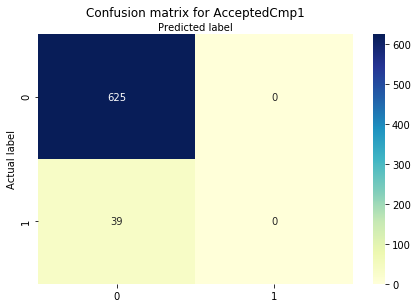

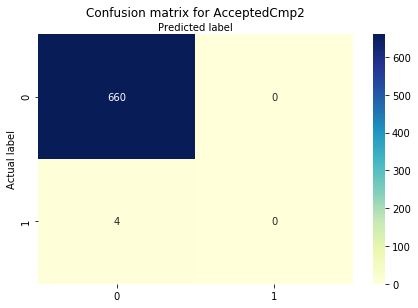

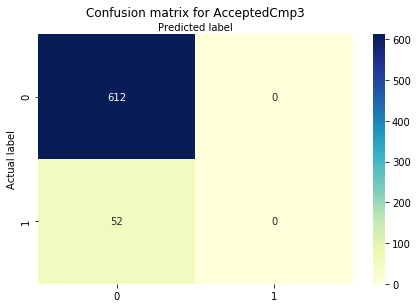

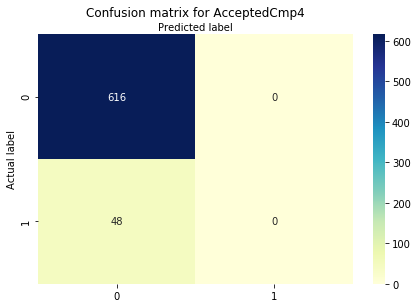

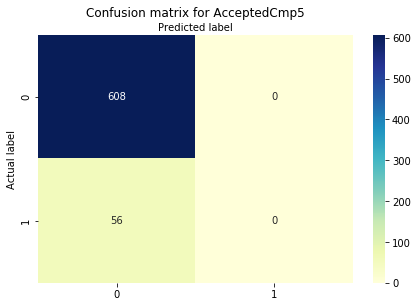

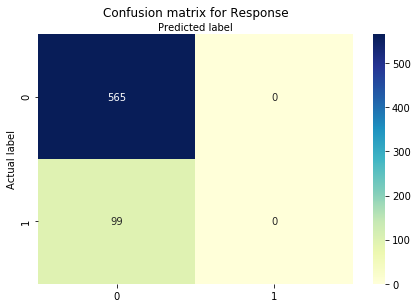

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

for col in campaign_data.columns:
    x_train, x_test, y_train, y_test = train_test_split(country_dummy,
                                                        campaign_data[col], 
                                                        test_size=0.3,
                                                        random_state=42)

    LogReg = LogisticRegression()

    LogReg.fit(x_train, y_train)
    test_predictions = LogReg.predict(x_test)
    test_proba = LogReg.predict_proba(x_test)
    c_matrix = confusion_matrix(y_test, test_predictions)
    
    # Plotting the confusion matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(f'Confusion matrix for {col}', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
#     print("Accuracy:",metrics.accuracy_score(y_test, test_predictions))
#     print("Precision:",metrics.precision_score(y_test, test_predictions))
#     print("Recall:",metrics.recall_score(y_test, test_predictions))

### Insights

This logistic regression model is not good at detecting Actual positives (people who accepted the campaign), thus our recall score being very low. 

We want to focus on the recall score to assess the performance of this model because we want to capture the people who accept the campaign (true positives).

### Using stasmodels.glm

In [81]:
from scipy import stats

pvalue_results = []
for col in campaign_data.columns:
    y = campaign_data[col]
    model = sm.GLM(y, country_dummy, family=sm.families.Binomial())
    model_results = model.fit()
    chi_sq = model_results.pearson_chi2
    p_values = stats.distributions.chi2.sf(chisq , 7)
    pvalue_results.append(p_values)
    print(col)
    print(model_results.summary())
    print('\n')
    # What do these results mean?
print(pvalue_results)

AcceptedCmp1
                 Generalized Linear Model Regression Results                  
Dep. Variable:           AcceptedCmp1   No. Observations:                 2212
Model:                            GLM   Df Residuals:                     2204
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -525.97
Date:                Mon, 13 Dec 2021   Deviance:                       1051.9
Time:                        10:31:47   Pearson chi2:                 2.21e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Country_AUS    -2.9957      0.387    

### Insights

### Interpreting all the results

### Logit attempt

In [82]:
# for col in campaign_data.columns:
#     y = campaign_data[col]
#     logit_model = sm.Logit(y, country_dummy)
#     result=logit_model.fit()
#     print(col)
#     print(result.summary2())

# 3. Data Visualizations

Here, we'll be creating additional visualizations to gain further insight.

**Questions we'll be answering:**

- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?

Questions to answer:
- The highest selling product
- The most successful marketing campaign. Narrow down in each country
- Most popular purchase site (web, catalog, store)
- What kind of purchases are being made with discounts?
- How many complaints?
- Understand the demographics of the customers. 
    - Where are they from?
    - What income class?
    - Marital Status?
    - How many people have 1 kid? 2 kids?
    
    
- Low income = <\$40,000
- Middle class = $40,000 - 120,000
- Upper = >120,000

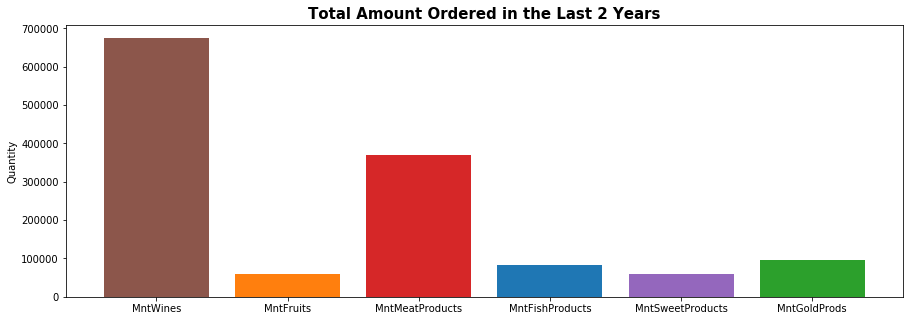

In [83]:
product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

fig = plt.figure(figsize=(15,5))
colors = ['tab:brown','tab:orange','tab:red','tab:blue','tab:purple','tab:green']
plt.bar(x=product_cols,
        height=data[product_cols].sum(),
        color=colors)
plt.title("Total Amount Ordered in the Last 2 Years", fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel("Quantity")

plt.show()

In [84]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
for col in campaign_cols:
    print(data[col].value_counts())

0    2070
1     142
Name: AcceptedCmp1, dtype: int64
0    2182
1      30
Name: AcceptedCmp2, dtype: int64
0    2049
1     163
Name: AcceptedCmp3, dtype: int64
0    2048
1     164
Name: AcceptedCmp4, dtype: int64
0    2051
1     161
Name: AcceptedCmp5, dtype: int64
0    1879
1     333
Name: Response, dtype: int64


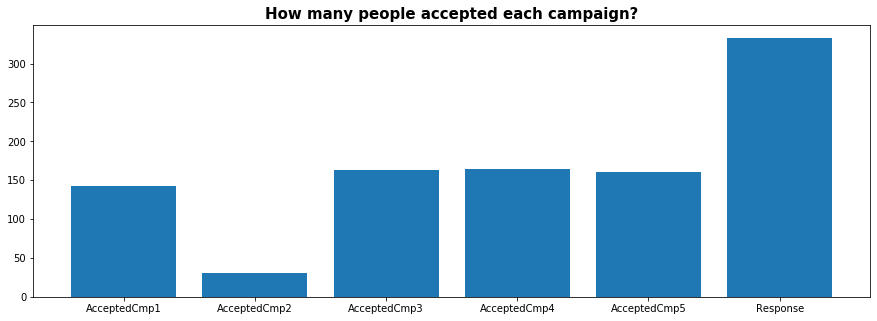

In [85]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
fig = plt.figure(figsize=(15,5))
plt.bar(x=campaign_cols,
        height=data[campaign_cols].sum())

plt.title("How many people accepted each campaign?", fontdict={'fontsize':15,'fontweight':'bold'})

plt.show()

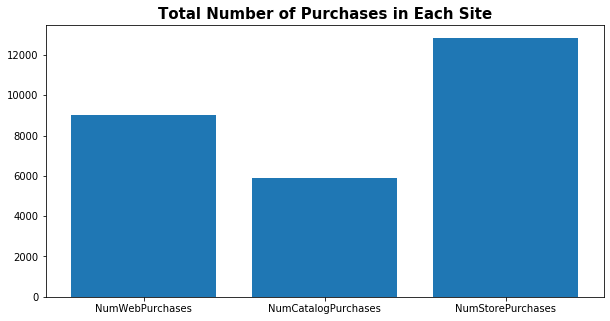

In [86]:
fig = plt.figure(figsize=(10,5))

plt.bar(x=['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'],
        height=data[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(),)
plt.title("Total Number of Purchases in Each Site", fontdict={'fontsize':15,'fontweight':'bold'})
plt.show()

In [87]:
print("Total Website Visits Last Month: {}".format(data['NumWebVisitsMonth'].sum()))

Total Website Visits Last Month: 11771


In [88]:
data['Income_class'] = np.where(data['Income']<40000, 'Low',
                                np.where(data['Income'].between(40000,120000,inclusive='right'), 'Middle', 
                                         'Upper'))


<ipython-input-89-c05b0a22a5db>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['Average_qty'] = low['Qty'] / num_low_customers
<ipython-input-89-c05b0a22a5db>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle['Average_qty'] = middle['Qty'] / num_mid_customers
<ipython-input-89-c05b0a22a5db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

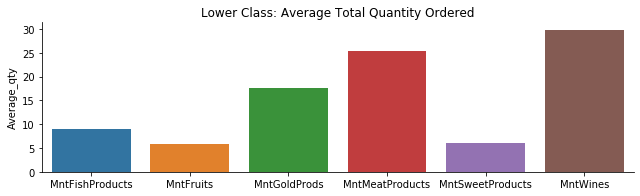

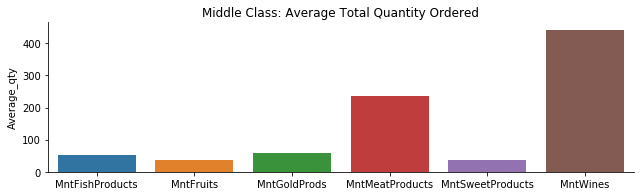

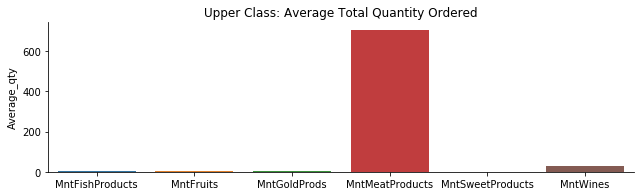

In [89]:
product_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

num_low_customers = data[data['Income_class'] == "Low"].shape[0]
num_mid_customers = data[data['Income_class'] == "Middle"].shape[0]
num_upp_customers = data[data['Income_class'] == "Upper"].shape[0]

tidy = data.melt(id_vars='Income_class', 
                 value_vars=product_cols,
                 value_name='Qty').groupby(['Income_class','variable']).sum().reset_index()


low = tidy[tidy['Income_class']=='Low']
middle = tidy[tidy['Income_class']=='Middle']
upper = tidy[tidy['Income_class']=='Upper'] 

low['Average_qty'] = low['Qty'] / num_low_customers
middle['Average_qty'] = middle['Qty'] / num_mid_customers
upper['Average_qty'] = upper['Qty'] / num_upp_customers


p1 = sns.catplot(x='variable', y='Average_qty', row='Income_class', 
                 data=low,
                 kind='bar',
                 height=3, aspect=3)
p2 = sns.catplot(x='variable', y='Average_qty', row='Income_class', 
                 data=middle,
                 kind='bar',
                 height=3, aspect=3)
p3 = sns.catplot(x='variable', y='Average_qty', row='Income_class', 
                 data=upper,
                 kind='bar',
                 height=3, aspect=3)

p1.set(xlabel=None, title="Lower Class: Average Total Quantity Ordered")
p2.set(xlabel=None, title="Middle Class: Average Total Quantity Ordered")
p3.set(xlabel=None, title="Upper Class: Average Total Quantity Ordered")

plt.show()

### Insights
The bar graphs above tell us the average total quantity ordered based on the product grouped by each income class (lower, middle, upper). The amount of customers in each income class also vary. The sample size for each are small since we are working with only 2,212 customers.

**Note that the y-axis scale differs between each graph.**

- We can say that people order meat and wine products the most.


# Conclusion

Let's recall the overall goal of this analysis.

You're a marketing analyst and you've been told by the CMO that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the dataset to understand this problem and propose data-driven solutions.

### Questions we answered and recommendations:

- What factors are significantly related to the number of store purchases?
    - **Result**: The total amount of products bought, number of website visits, number of meat products, the number of website purchases, and the income were the top 5 significant features related to the number of in store purchases.
    - **Recommendation**: To increase the number of in store purchases, we must find ways to attract more people to our website. This can mean a better UI/UX and/or more outreach online. On top of that, since income was one of the significant features, we can further analyze what products each income class bought and improve our strategy on selling those specific products to our target demographic.
- Does US fare significantly better than the Rest of the World in terms of total purchases? (NOT SURE WHAT THIS MEANS)
    - **Result**: US was 7th out of 8th in terms of total purchases.
    - **Recommendation**: With a goal of increasing US sales, further analyze the US market. What kind of products are people in the US buying? Are they buying on the website? Catalog? In store? 
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.
    - **Result**: The relationship between the amount of gold products bought and number of in store purchases had a correlation of 0.39 (slight positive correlation) and a p-value of 1.41e-81 (statistically significant). This means that the more gold products a customer bought, the more in store purchases they made as well, (not causation), therefore, refuting our supervisor's statement of gold buyers are more conservative.
    - **Recommendation**: If our goal was to sell more gold products, we must funnel these customers who like gold to purchase in store, versus the other channels of our catalog and website. Once we do that, we can maybe find complements with gold and do the same for those products.
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
    - **Result**: The relationship between the amount of fish products bought and those who are married and have a PhD had a correlation of -0.077 (weak negative correlation to none) and a p-value of 0.0038 (statistically significant). The other factors that are significantly related to fish products are total products bought, amount of wine, meat, gold, sweet, and fruit products bought.
    - **Recommendation**: Since the variance increases the most when wine and meat products are removed from our linear regression model the most compared to the other products, we can further analyze what channels in which people are buying these products and improve our sales in these products. OR focus our efforts in selling the other products.
- Is there a significant relationship between geographical regional and success of a campaign?
    - **Result**:
    - **Recommendation**:

#### Other recommendations
- The most recent campaign was the most successful, so we can further investigate what attributes of this campaign made it successful, understand where people are accepting it, etc, and apply it to future campaigns
- In store purchases were the top performing channel, so we can find other ways to improve the 2 others (website purchases and catalog purchases).